In [8]:
## 21회 모의고사

## 머신 러닝 (50점)
# 데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

# 1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) 
# 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.
# 학생성적 : grade
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, 
# 현업에서 사용시 주의할 점 등에 대해 기술하시오.

In [2]:
import pandas as pd
import numpy as np  

df01 = pd.read_csv("C:/adp/data/student_data.csv")
df01.tail()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12
394,MS,M,no,no,3.0,2.0,3.0,3.0,3.0,5.0,5.0,9,8,9


In [2]:
# 1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) 
df01.info()
# 각 변수에 famrel 1 freetime 2 goout 3 Dalc 4 Walc 2 health 4 absences 3 결측치가 존재함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [3]:
df02 = pd.DataFrame(df01.info())
df02 # DataFrame 형식으로 저장이 안됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


""


<BarContainer object of 19 artists>

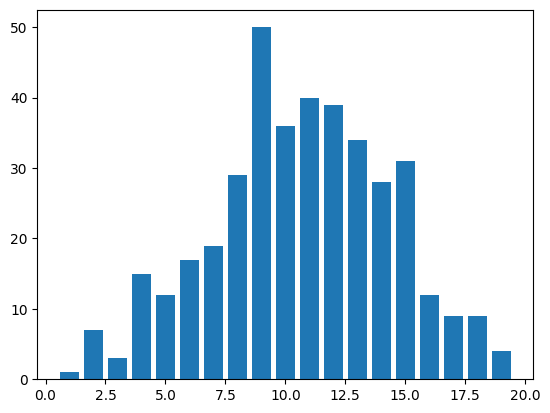

In [4]:
# 종속변수 학생 성적(grade)에 대한 시각화
import matplotlib.pyplot as plt
plt.bar(df01['grade'].value_counts().index, df01['grade'].value_counts().values)

# 종속변수 학생 성적(grade)는 1~19점의 분포를 가지고 있으며 평균 10.66임


In [5]:
# 연속형변수 분포 확인
df01.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


<BarContainer object of 34 artists>

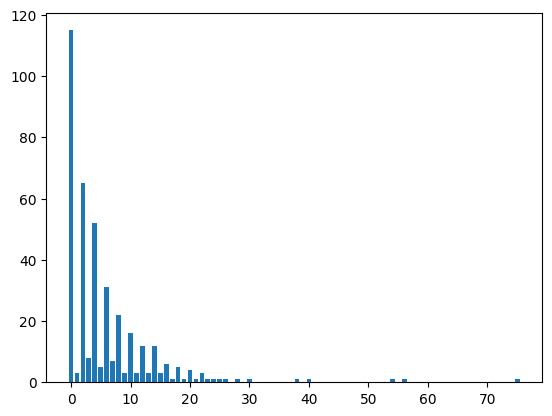

In [6]:
# 연속형변수 중 특이 Case 확인
# absences 평균은 5.67인데 max가 75로 다소 큼
plt.bar(df01['absences'].value_counts().index, df01['absences'].value_counts().values)

In [7]:
# absences가 높을때 grade가 대부분 평균이상으로 absences, grade가 양의 상관관계가 있을것으로 보임
df01[df01['absences'] >= 20]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
74,GP,F,yes,yes,4.0,3.0,3.0,2.0,4.0,5.0,54.0,11,11,12
103,GP,F,yes,no,4.0,3.0,5.0,1.0,1.0,2.0,26.0,6,7,6
118,GP,M,no,yes,5.0,2.0,4.0,1.0,4.0,5.0,20.0,8,9,7
183,GP,F,no,yes,5.0,3.0,3.0,2.0,3.0,1.0,56.0,9,9,9
198,GP,F,no,no,4.0,2.0,4.0,2.0,3.0,2.0,24.0,18,18,18
205,GP,F,yes,no,4.0,4.0,3.0,3.0,4.0,5.0,28.0,9,10,9
216,GP,F,yes,no,3.0,4.0,5.0,2.0,4.0,1.0,22.0,5,6,6
237,GP,F,no,no,4.0,5.0,2.0,1.0,1.0,5.0,20.0,12,13,12
260,GP,F,yes,no,3.0,1.0,2.0,1.0,3.0,2.0,21.0,18,17,18


<BarContainer object of 2 artists>

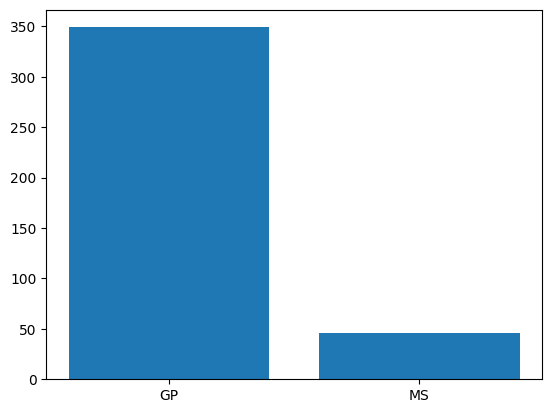

In [8]:
# 범주형 변수 확인. 특이 case 없음
plt.bar(df01['school'].value_counts().index, df01['school'].value_counts().values)

<BarContainer object of 2 artists>

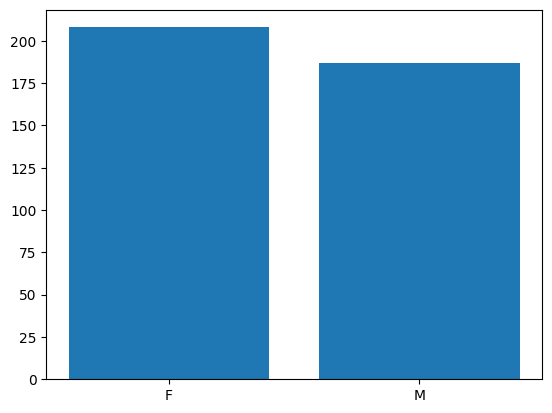

In [9]:
plt.bar(df01['sex'].value_counts().index, df01['sex'].value_counts().values)

<BarContainer object of 2 artists>

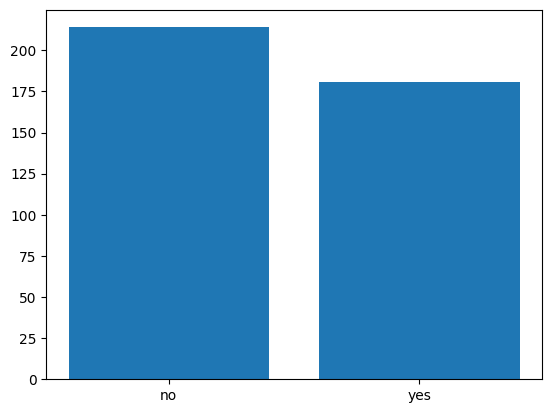

In [10]:
plt.bar(df01['paid'].value_counts().index, df01['paid'].value_counts().values)

<BarContainer object of 2 artists>

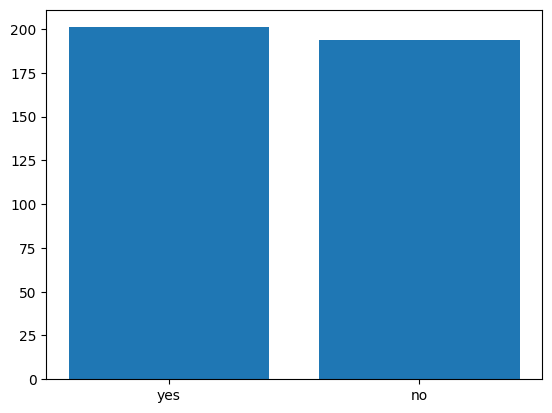

In [11]:
plt.bar(df01['activities'].value_counts().index, df01['activities'].value_counts().values)

In [ ]:
# 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.
df03 = pd.DataFrame(df01.describe())
df03.columns

Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'grade', 'G1', 'G2'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro
for i in df03.columns:
    print(i, shapiro(df01[df01[i].isna() == False][i]))
# 모두 정규성을 따른다.

famrel ShapiroResult(statistic=0.8305912017822266, pvalue=4.342121128179169e-20)
freetime ShapiroResult(statistic=0.9058030247688293, pvalue=6.678090341865261e-15)
goout ShapiroResult(statistic=0.9093744158744812, pvalue=1.4338404324531345e-14)
Dalc ShapiroResult(statistic=0.5966153144836426, pvalue=3.704366456028775e-29)
Walc ShapiroResult(statistic=0.8458338379859924, pvalue=3.5397767427650165e-19)
health ShapiroResult(statistic=0.8481693863868713, pvalue=5.502694947917134e-19)
absences ShapiroResult(statistic=0.663653552532196, pvalue=4.026954268924482e-27)
grade ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)
G1 ShapiroResult(statistic=0.9749146103858948, pvalue=2.4554813080612803e-06)
G2 ShapiroResult(statistic=0.9691444635391235, pvalue=2.0864966643330263e-07)


In [145]:
# 분포가 큰 absences는 회귀대체, 나머지는 평균대체 사용 / 설명이 부족합니다 ㅠ
# 1-2.1 평균대체
na_list1 = df03.columns.drop('absences')
na_list2 = 'absences'
na_list3 = df01['absences'].isna()


In [151]:
df05 = df01.fillna(df01.mean())
df05.isna().sum()

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [190]:
# 1-2.1 회귀대체 https://rfriend.tistory.com/636
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
# X and y after excluding missing values
X = df05[na_list3 == False][na_list1]
y = df05[na_list3 == False]['absences']

# 회귀모델
lin_reg_model = lin_reg.fit(X, y)

In [205]:
y_pre = lin_reg_model.predict(df05[na_list1]) # absences 회귀추정
y_pre[na_list3 == True] # absences 결측치 회귀추정값

array([4.97281709, 3.8081604 , 4.3242389 ])

In [231]:
df05['absences'][15] = y_pre[na_list3 == True][0]
df05['absences'][82] = y_pre[na_list3 == True][1]
df05['absences'][225] = y_pre[na_list3 == True][2]

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [241]:
df05.isna().sum() # 결측치 확인

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [5]:
## KNN을 이용한 결측치 대체 / KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만을 추출
KNN_data = df01.drop(columns=['school', 'sex', 'activities', 'paid'])

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)


In [7]:
df_filled.tail()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0
394,3.0,2.0,3.0,3.0,3.0,5.0,5.0,9.0,8.0,9.0


In [8]:
df01[KNN_data.columns] = df_filled

# 결측치 확인
df01.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [246]:
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.
# get_dummies https://blog.naver.com/regenesis90/222944902855
df05.dtypes # 범주형변수 school, sex, paid, activities에 대해서 원핫인코딩으로 변환
df06 = pd.get_dummies(data = df05, columns = ['school', 'sex', 'paid', 'activities'], drop_first = True) 
# drop_first 첫 번째 범주를 기본으로 하기 위해 더미변수에서 제외할지 여부

df06.tail()

In [249]:
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.
# 1.4.1 단순랜덤 추출
# > 무작위로 Train, Test 데이터를 분할하고 Train 데이터로 분석 모델을 학습하고 Test 데이터로 분석 모델 정확도 등을 측정함
# 1.4.2 층화 추출
# > 설명력이 높은 주요변수나 종속변수가 범주형인 경우에 범주형 변수의 구성 비율을 동일하게 데이터셋을 구성한다. 범주형 변수의 편향을 막을 수 잇음
# 해당 데이터는 종속변수가 연속형이므로 단순랜덤추출 기법을 활용한다.
from sklearn.model_selection import train_test_split
X = df06.drop('grade', axis = 1)
y = df06['grade']

# train, test를 7:3 비율로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2023)

In [250]:
X_train.tail()
# 분할기법 설명 : https://lovelydiary.tistory.com/411

,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,paid_yes,activities_yes
3,3.0,2.0,2.0,1.0,1.000000,5.0,2.0,15,14,0,0,1,1
220,4.0,2.0,5.0,1.0,2.000000,5.0,2.0,6,6,0,0,0,1
183,5.0,3.0,3.0,2.0,3.000000,1.0,56.0,9,9,0,0,0,1
25,1.0,2.0,2.0,1.0,2.284987,5.0,14.0,6,9,0,0,1,0
343,3.0,3.0,1.0,1.0,2.000000,4.0,0.0,9,8,0,0,0,0


In [230]:
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.
# 학생성적 : grade
# 3개의 알고리즘 모두 예측분석과 분류분석이 가능한 분석모델이며 예측분석시, 다중공산성 문제를 해결할 수 있음.
# SVM은 커널트릭, xgboost와 randomforest는 트리모델을 통해 다중공선성을 해결할 수 있다.

4.972817089824268

In [251]:
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, 
# 현업에서 사용시 주의할 점 등에 대해 기술하시오.
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

# 정규화
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [253]:
# SVM  최적 모델 찾기1
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.1, 1,10,100, 1000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
19,100.0,0.0010,0.960914
24,1000.0,0.0001,0.960177
25,1000.0,0.0010,0.959174
14,10.0,0.0100,0.958596
20,100.0,0.0100,0.951003
18,100.0,0.0001,0.943504
13,10.0,0.0010,0.942820
8,1.0,0.0100,0.927779
26,1000.0,0.0100,0.919765
15,10.0,0.1000,0.879504


In [255]:
# SVM  최적 모델 찾기2
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [80, 90, 100, 110, 120,130,140,150],'gamma': [0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
51,140,0.0011,0.961232
59,150,0.0011,0.961232
44,130,0.0012,0.961230
29,110,0.0013,0.961215
37,120,0.0013,0.961214
...,...,...,...
9,90,0.0009,0.960539
16,100,0.0008,0.960488
1,80,0.0009,0.960345
8,90,0.0008,0.960290


In [257]:
svr = SVR(C=140, gamma = 0.0011) 
svr.fit(X_train_scaled, y_train)

print("svm R2 : ", svr.score(X_test_scaled, y_test))
print("svm RMSE:", np.sqrt(mean_squared_error(y_test,svr.predict(X_test_scaled))))

svm R2 :  0.9546918963742925
svm RMSE: 0.8548108293587886


In [310]:
# RandomForest 최적 모델 찾기
rf_grid = [
    { 'max_depth': range(2,20,2), 'min_samples_split': range(2,20,2) }
]

rf  = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid = rf_grid, cv = 5)
rf.fit(X_train, y_train)

print(rf.best_params_)
print("R2 : ", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

KeyboardInterrupt: 

In [325]:
# RandomForest 최적 모델 찾기
# RandomForest : https://inuplace.tistory.com/570
random_state = 42
rf_grid = [
    { 'max_depth': range(2,6,2), 'min_samples_split': range(2,6,2),   }
]

rf  = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state = 2022), param_grid = rf_grid, cv = 5) # random_state 미 기입하면 분석마다 달라짐
rf.fit(X_train, y_train)

print(rf.best_params_)
print("R2 : ", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

{'max_depth': 4, 'min_samples_split': 4}
R2 :  0.9616271998894816
RMSE: 0.7866722282094274


In [295]:
# xgb 최적 모델 찾기
# xgb_grid = [
#     { 'max_depth': range(2,40,2) }
# ]
xgb_grid = [
    { 
        # 트리의 개수 
        'n_estimators' : range(100,1000,100),
        # 질문 깊이 
        'max_depth' : range(2,20,2)
        }
         ]
# xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid =xgb_grid, cv = 5)
xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, scoring='r2', cv = 5)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

print("R2 : ", xgb.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))
print(f'최적의 하이퍼 파라미터 : {xgb.best_params_}')
print(f'최적의 모델 평균 성능 : {xgb.best_score_}')

R2 :  0.9710151088782522
RMSE: 0.6837036675798409
최적의 하이퍼 파라미터 : {'max_depth': 2, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.9578983597086144


In [262]:
# xgb 모델의 R2가 0.9686으로 가장 높고 RMSE가 0.7112러 가장 낮아서 가장 적합한 분석모델입니다.
# 


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'min_samples_split': [2, 4, 6, 8, 10]}])

In [ ]:
#  설치가 안됨 ㅠ
from xgboost import plot_importance
plot_importance(xgb)

In [267]:
from xgboost import xgb

0.9526579916944364

In [ ]:
!pip install xgboost